In [42]:
# Import Libraries

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import pandas as pd

In [43]:
#1.Load Data
df=pd.read_csv(r"C:\Users\goex1\Desktop\Data Science - Heart Disease\framingham.csv")

#2. Overview of dataset
df.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [44]:
numerische_spalten = df.select_dtypes(include='float64').columns

#2. Overview about dataset
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [45]:
#Data types korrigieren:

df['male'] = df['male'].astype('Int64')
df['age'] = df['age'].astype('float64')
df['currentSmoker'] = df['currentSmoker'].astype('int64')




In [ ]:

#barplots of all variables#

for feature in df:
    sns.histplot(data=df,x=feature, color="navy")
    plt.title(f" Barplot - {feature}")
    plt.show()


In [ ]:
#Boxplot of all numeric data#

numerische_spalten = df.select_dtypes(include='float64').columns
                                    

for feature in numerische_spalten:
    sns.boxplot(data=df, y=feature, color="orange")
    plt.title(f'Boxplot - {feature}')
    plt.show()



In [46]:
#Missing Data?

df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [47]:
# Data Imputation

df['education'] = df['education'].fillna(0).astype('int64')
df['cigsPerDay'] = df['cigsPerDay'].fillna(0).astype('float64')
df['BPMeds'] = df['BPMeds'].fillna(0).astype('int64')
df['totChol'] = df['totChol'].fillna(df['totChol'].mean()).astype('float64')
df['BMI'] = df['BMI'].fillna(df['BMI'].mean()).astype('float64')
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].mean()).astype('float64')
df['glucose'] = df['glucose'].fillna(df['glucose'].mean()).astype('float64')


In [48]:
#Feature Selection

X = df[['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 
        'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]

y = df['TenYearCHD']

In [49]:
#Train-Test-Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)



In [50]:
#Model training

from sklearn.linear_model import LogisticRegression

logistic=LogisticRegression(class_weight="balanced")

logistic.fit(X_train,y_train)

c:\Users\goex1\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [51]:
#Model Test

y_pred=logistic.predict(X_test)

print(X_train.columns)

print("Coefficients of features:",logistic.coef_)



Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')
Coefficients of features: [[ 0.15454414  0.03633438 -0.09451545 -0.06496995  0.02453128  0.07807864
   0.02470405  0.31570853  0.05384273 -0.00307005  0.01784372 -0.01346751
  -0.04493906 -0.02106447  0.00345368]]


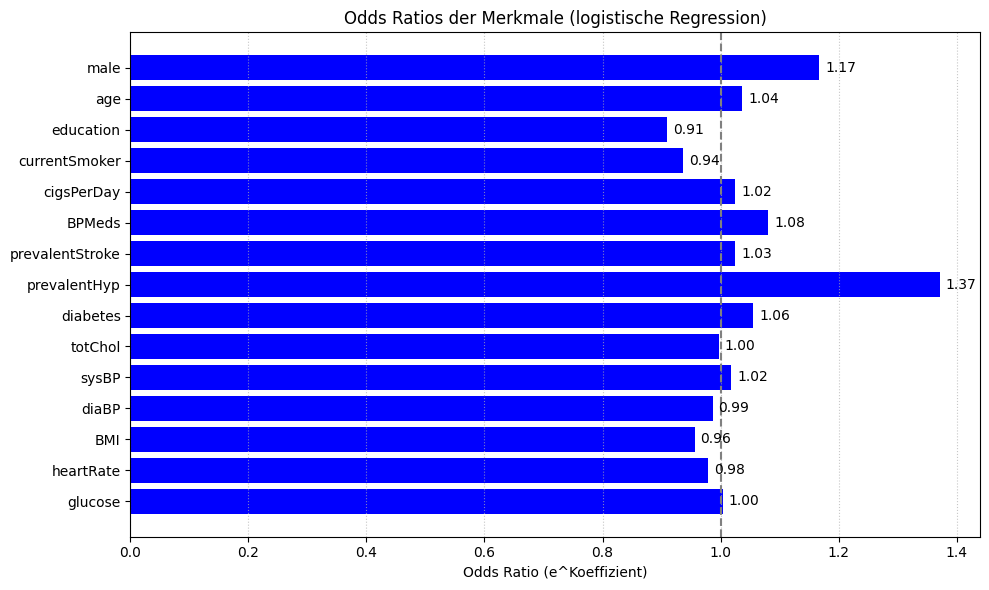

In [56]:
#Graphical representation of the results

# Features und Koeffizienten 

features = X_train.columns
coefficients = logistic.coef_[0]
odds_ratios = np.exp(coefficients)

df = pd.DataFrame({
    'Feature': features,
    'Odds Ratio': odds_ratios
})

# Odds Ratios berechnen
odds_ratios = np.exp(coefficients)


# Balkendiagramm erstellen
plt.figure(figsize=(10, 6))
bars = plt.barh(df['Feature'], df['Odds Ratio'], color='blue')
plt.axvline(1.0, color='gray', linestyle='--')
plt.xlabel('Odds Ratio (e^Koeffizient)')
plt.title('Odds Ratios der Merkmale (logistische Regression)')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle=':', alpha=0.7)

# 5. Werte an Balken schreiben
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2,
             f'{width:.2f}', va='center')

plt.tight_layout()
plt.show()

In [54]:
#Model Quality

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

acc=accuracy_score(y_test,y_pred)
print(acc)

confusion=confusion_matrix(y_test,y_pred)
print(confusion)

classification=classification_report(y_test,y_pred)
print(classification)




0.6375982844889206
[[763 431]
 [ 76 129]]
              precision    recall  f1-score   support

           0       0.91      0.64      0.75      1194
           1       0.23      0.63      0.34       205

    accuracy                           0.64      1399
   macro avg       0.57      0.63      0.54      1399
weighted avg       0.81      0.64      0.69      1399



In [55]:
probas = logistic.predict_proba(X_test)[:, 1]

# Neuen, niedrigeren Threshold setzen
threshold = 0.385

# Vorhersagen basierend auf neuem Threshold erzeugen
y_pred_new = (probas >= threshold).astype(int)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_new))

              precision    recall  f1-score   support

           0       0.92      0.34      0.50      1194
           1       0.18      0.83      0.29       205

    accuracy                           0.41      1399
   macro avg       0.55      0.58      0.39      1399
weighted avg       0.81      0.41      0.47      1399

